<img src='https://user-images.githubusercontent.com/73154316/136381087-867ba3ac-b403-4ae5-b942-ae30d5c02f41.png' />

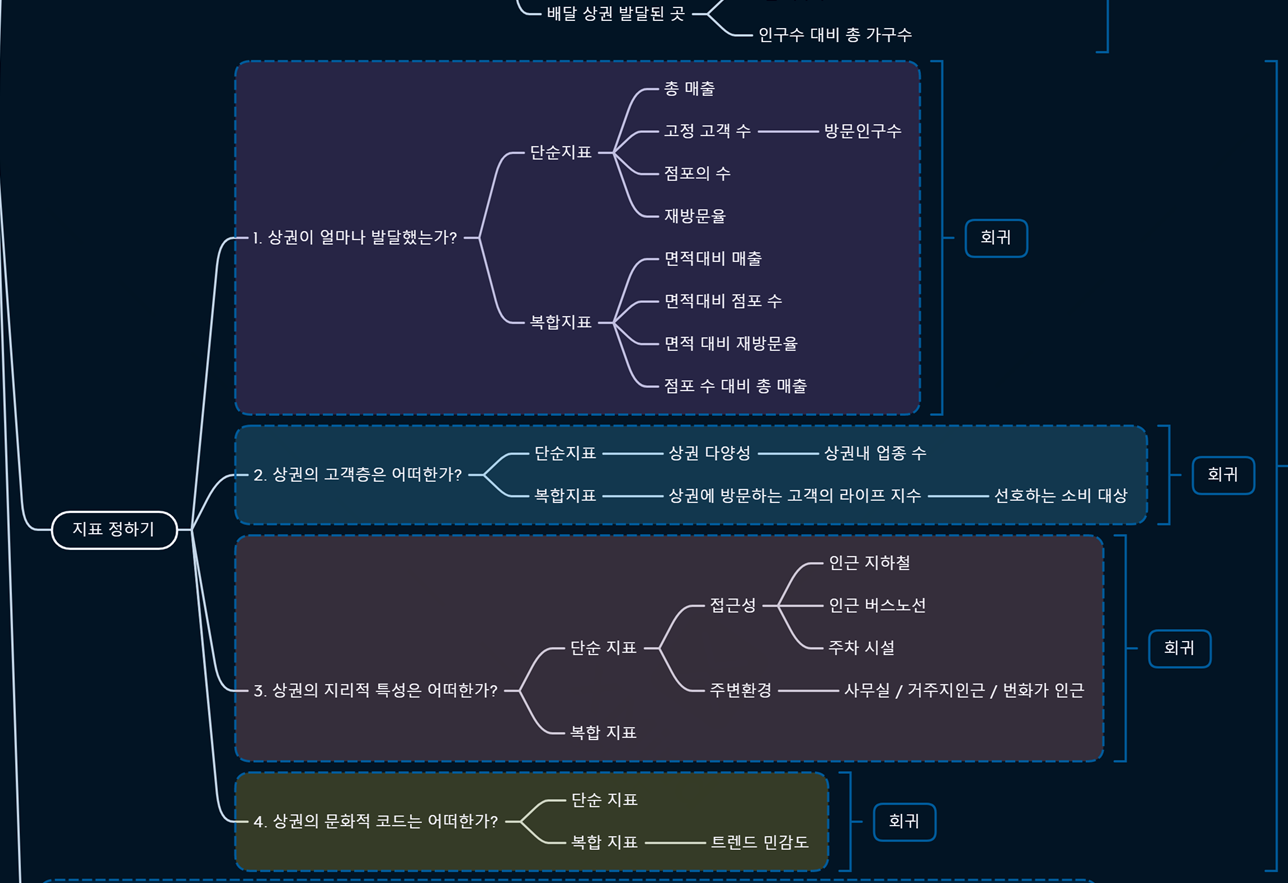

# 라이브러리 로드

In [1]:
# 기초 전처리
import pandas as pd
import numpy as np
import geopandas as gpd
from tqdm import tqdm
%matplotlib inline

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os

# 캔버스 사이즈 적용
plt.rcParams['figure.figsize'] = (12, 9)

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

# 필요 함수 로드

In [2]:
def get_object_type(df):
    df['상권_코드'] = df['상권_코드'].apply(lambda x : str(x))
    df.astype({'상권_코드':object})
    try:
        df.drop('상권_이름', inplace=True, axis=1)
    except:
        pass
    return df

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def get_Standard(df_x):
    s_scaler = StandardScaler()
    return s_scaler.fit_transform(np.array(df_x).reshape(-1, 1))

def get_MinMaxScaler(df_x):
    m_scaler = MinMaxScaler()
    return m_scaler.fit_transform(np.array(df_x).reshape(-1, 1))

In [4]:
# 피밸류 보는 함수
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
def get_summary(X,y):
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_VIF(df):
    # Define a nice color map for our heatmap
#     plt.rc('font', family='NanumBarunGothic') 
    plt.rcParams['font.family'] = 'Malgun Gothic'
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(
            data=df.corr(),  # our correlation matrix
            linewidths=0.3,  # the width of lines separating the matrix squares
            square=True,   # enforce 1:1 ratios among correlation cells
            cmap=cmap,  # use the color map we defined above
            vmax=1,  # define the max of our correlation scale
            vmin=-1, # define the min of our correlation scale
            center=0,  # The value at which the color map is centered about (white)
            cbar_kws={"shrink": .75}  # shrink the scale a bit
        )
    # adjust y-axis ticks for legibility
    plt.yticks(rotation=0)  
    # show the heatmap
    plt.show()

# 자료 로드

**훈련 데이터 list**

* 상권건물.csv

* 상권건물_배후지.csv

* 상권인구.csv

* 상권인구_배후지.csv

* 상권건물.csv

* 상권건물_배후지.csv

* 매출 분석 !! 준혁



* 지리 자료 !! 승순


**타겟 데이터 list**

* 경향성 분석 !! 
    * j_result/매출_회귀계수.csv
    * j_result/음식_회귀계수.csv
    * j_result/주말_회귀계수.csv

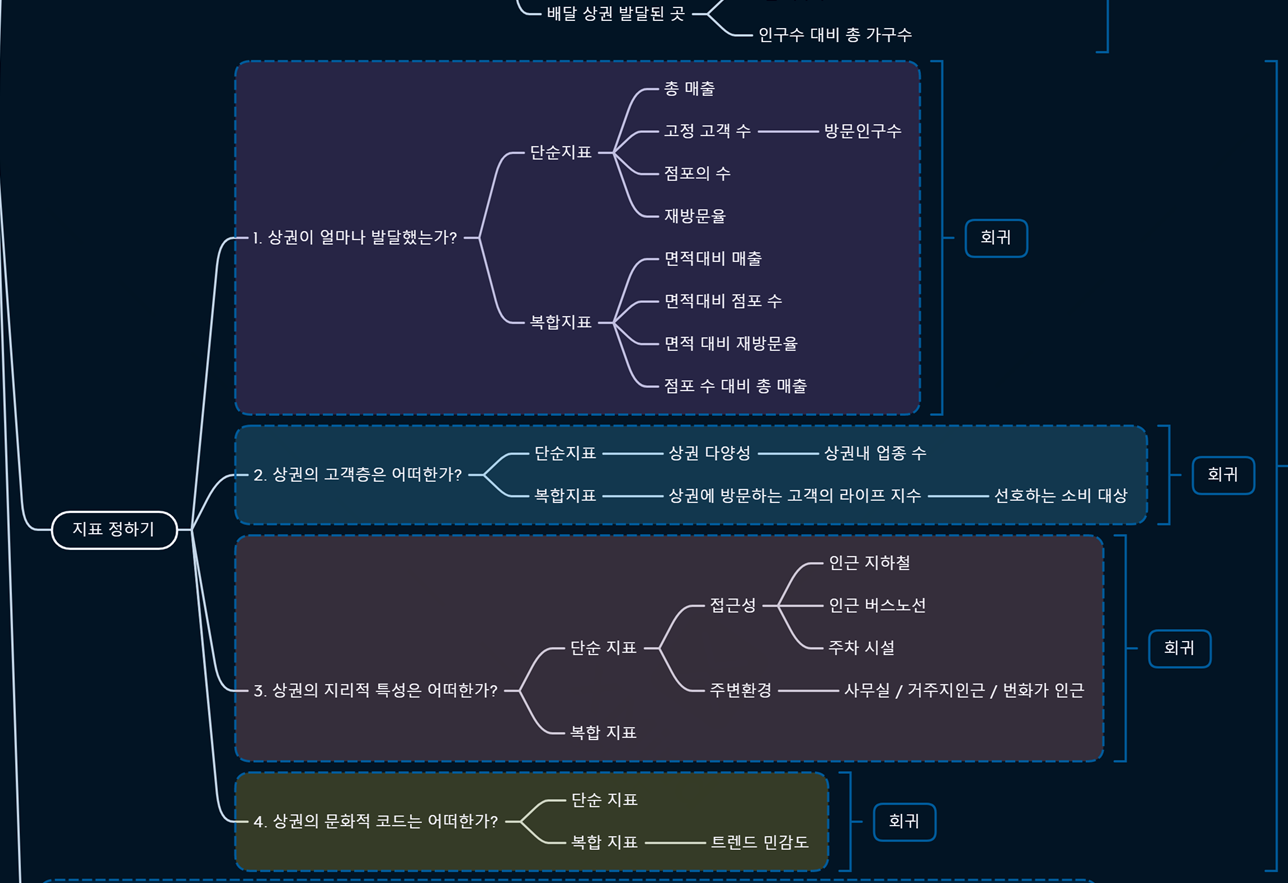

# 상권이 얼마나 발달했는가?

## 단순지표

1. 총매출

2. 고객수를 대표 할 지수

3. 점포의 수

4. 재방문율? 고정 방문 고객수? 

5. 유동인구



##  복합지표

1. 면적대비 매출

2. 점포수 대비 매출

3. 면전 대비 점포수

# 단순지표

In [6]:
bs_area = gpd.read_file('data/geojson/상권_geometry_좌표.geojson', driver= 'GeoJSON')
bs_area= bs_area[bs_area['TRDAR_SE_C'] == 'A']
df_base = bs_area[['TRDAR_CD','TRDAR_SE_1']].sort_values('TRDAR_CD').reset_index(drop=True)
df_base.columns = ['상권_코드', '상권_이름']
df_base = get_object_type(df_base)
df_base.head()

,상권_코드
0,1000001
1,1000002
2,1000003
3,1000004
4,1000005


In [7]:
df_all = df_base.copy()

##  총매출

`1년_매출`, `1년_매출_log`

In [8]:
# 20_34, 21_12 분기 매출
df_rev = pd.read_csv('data/my_result/1년_매출.csv')
df_rev['1년_매출_log'] = df_rev['1년_매출'].agg(np.log1p)
df_rev = get_object_type(df_rev)

In [9]:
# df_rev

In [10]:
df_all = pd.merge(left=df_all, right=df_rev, on='상권_코드', how='left')
# df_all

## 고객수를 대표 할 지수?!

`배후지_총_생활_인구_수`

In [11]:
df_pop_b = pd.read_csv('data/my_result/상권인구_배후지.csv')
df_pop_b = get_object_type(df_pop_b)

In [12]:
df_pop_b

,상권_코드,배후지_총_생활인구_수,배후지_남성_생활인구_수,배후지_여성_생활인구_수,배후지_연령대_10_생활인구_수,배후지_연령대_20_생활인구_수,배후지_연령대_30_생활인구_수,배후지_연령대_40_생활인구_수,배후지_연령대_50_생활인구_수,배후지_연령대_60_이상_생활인구_수,배후지_시간대_1_생활인구_수,배후지_시간대_2_생활인구_수,배후지_시간대_3_생활인구_수,배후지_시간대_4_생활인구_수,배후지_시간대_5_생활인구_수,배후지_시간대_6_생활인구_수,배후지_월요일_생활인구_수,배후지_화요일_생활인구_수,배후지_수요일_생활인구_수,배후지_목요일_생활인구_수,배후지_금요일_생활인구_수,배후지_토요일_생활인구_수,배후지_일요일_생활인구_수,배후지_남성_생활인구_수_총인구대비_비율,배후지_여성_생활인구_수_총인구대비_비율,배후지_연령대_10_생활인구_수_총인구대비_비율,배후지_연령대_20_생활인구_수_총인구대비_비율,배후지_연령대_30_생활인구_수_총인구대비_비율,배후지_연령대_40_생활인구_수_총인구대비_비율,배후지_연령대_50_생활인구_수_총인구대비_비율,배후지_연령대_60_이상_생활인구_수_총인구대비_비율,배후지_시간대_1_생활인구_수_총인구대비_비율,배후지_시간대_2_생활인구_수_총인구대비_비율,배후지_시간대_3_생활인구_수_총인구대비_비율,배후지_시간대_4_생활인구_수_총인구대비_비율,배후지_시간대_5_생활인구_수_총인구대비_비율,배후지_시간대_6_생활인구_수_총인구대비_비율,배후지_월요일_생활인구_수_총인구대비_비율,배후지_화요일_생활인구_수_총인구대비_비율,배후지_수요일_생활인구_수_총인구대비_비율,배후지_목요일_생활인구_수_총인구대비_비율,배후지_금요일_생활인구_수_총인구대비_비율,배후지_토요일_생활인구_수_총인구대비_비율,배후지_일요일_생활인구_수_총인구대비_비율
0,1000001,1081142.00,548255.25,532886.50,134831.50,153452.75,207655.50,217873.00,166640.00,200689.00,196188.25,241729.50,184454.0,182949.75,175165.75,100654.00,162101.00,167880.75,165795.50,165458.25,161774.00,132598.50,125534.25,0.507108,0.492892,0.124712,0.141936,0.192071,0.201521,0.154133,0.185627,0.181464,0.223587,0.170610,0.169219,0.162019,0.093100,0.149935,0.155281,0.153352,0.153040,0.149633,0.122647,0.116113
1,1000002,3643150.75,1825662.75,1817487.75,284956.00,598842.00,694745.50,623937.75,605031.25,835639.75,746978.50,764628.75,561650.0,563432.00,612312.00,394149.50,525121.75,528357.00,528595.75,526032.00,522033.00,506913.50,506097.75,0.501122,0.498878,0.078217,0.164375,0.190699,0.171263,0.166074,0.229373,0.205036,0.209881,0.154166,0.154655,0.168072,0.108189,0.144139,0.145027,0.145093,0.144389,0.143292,0.139142,0.138918
2,1000003,1732769.00,991745.25,741023.75,86649.00,322533.00,324534.75,319177.00,283800.25,396075.50,226121.25,336842.75,327960.0,345895.50,352877.50,143073.00,259865.00,271250.50,269837.50,268060.50,264725.25,218046.25,180985.00,0.572347,0.427653,0.050006,0.186137,0.187293,0.184201,0.163784,0.228580,0.130497,0.194396,0.189269,0.199620,0.203649,0.082569,0.149971,0.156542,0.155726,0.154701,0.152776,0.125837,0.104448
3,1000004,3164952.75,1481436.75,1683515.75,540905.75,948747.75,344886.75,412236.00,347404.25,570772.25,972296.25,689002.00,347553.5,317651.50,431292.25,407156.25,455354.50,457978.50,455669.75,455144.50,445046.00,441920.00,453840.75,0.468075,0.531924,0.170905,0.299767,0.108971,0.130250,0.109766,0.180341,0.307207,0.217697,0.109813,0.100365,0.136271,0.128645,0.143874,0.144703,0.143974,0.143808,0.140617,0.139629,0.143396
4,1000005,460215.00,216288.00,243927.75,67459.50,53214.75,54157.75,81447.75,78065.50,125869.50,124005.50,100354.25,54898.5,52622.50,69417.25,58917.00,64428.00,65039.00,65516.75,64755.75,65270.00,67085.00,68120.50,0.469972,0.530030,0.146583,0.115630,0.117679,0.176978,0.169628,0.273502,0.269451,0.218059,0.119289,0.114343,0.150837,0.128021,0.139995,0.141323,0.142361,0.140708,0.141825,0.145769,0.148019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1001486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1486,1001487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1487,1001488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,1001489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_pop_b_selected = df_pop_b.loc[:,:'배후지_일요일_생활인구_수']
df_pop_b_selected

,상권_코드,배후지_총_생활인구_수,배후지_남성_생활인구_수,배후지_여성_생활인구_수,배후지_연령대_10_생활인구_수,배후지_연령대_20_생활인구_수,배후지_연령대_30_생활인구_수,배후지_연령대_40_생활인구_수,배후지_연령대_50_생활인구_수,배후지_연령대_60_이상_생활인구_수,배후지_시간대_1_생활인구_수,배후지_시간대_2_생활인구_수,배후지_시간대_3_생활인구_수,배후지_시간대_4_생활인구_수,배후지_시간대_5_생활인구_수,배후지_시간대_6_생활인구_수,배후지_월요일_생활인구_수,배후지_화요일_생활인구_수,배후지_수요일_생활인구_수,배후지_목요일_생활인구_수,배후지_금요일_생활인구_수,배후지_토요일_생활인구_수,배후지_일요일_생활인구_수
0,1000001,1081142.00,548255.25,532886.50,134831.50,153452.75,207655.50,217873.00,166640.00,200689.00,196188.25,241729.50,184454.0,182949.75,175165.75,100654.00,162101.00,167880.75,165795.50,165458.25,161774.00,132598.50,125534.25
1,1000002,3643150.75,1825662.75,1817487.75,284956.00,598842.00,694745.50,623937.75,605031.25,835639.75,746978.50,764628.75,561650.0,563432.00,612312.00,394149.50,525121.75,528357.00,528595.75,526032.00,522033.00,506913.50,506097.75
2,1000003,1732769.00,991745.25,741023.75,86649.00,322533.00,324534.75,319177.00,283800.25,396075.50,226121.25,336842.75,327960.0,345895.50,352877.50,143073.00,259865.00,271250.50,269837.50,268060.50,264725.25,218046.25,180985.00
3,1000004,3164952.75,1481436.75,1683515.75,540905.75,948747.75,344886.75,412236.00,347404.25,570772.25,972296.25,689002.00,347553.5,317651.50,431292.25,407156.25,455354.50,457978.50,455669.75,455144.50,445046.00,441920.00,453840.75
4,1000005,460215.00,216288.00,243927.75,67459.50,53214.75,54157.75,81447.75,78065.50,125869.50,124005.50,100354.25,54898.5,52622.50,69417.25,58917.00,64428.00,65039.00,65516.75,64755.75,65270.00,67085.00,68120.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1001486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1486,1001487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1487,1001488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1488,1001489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_all = pd.merge(left=df_all, right=df_pop_b_selected, on='상권_코드', how='left')
df_all

,상권_코드,1년_매출,1년_매출_log,배후지_총_생활인구_수,배후지_남성_생활인구_수,배후지_여성_생활인구_수,배후지_연령대_10_생활인구_수,배후지_연령대_20_생활인구_수,배후지_연령대_30_생활인구_수,배후지_연령대_40_생활인구_수,배후지_연령대_50_생활인구_수,배후지_연령대_60_이상_생활인구_수,배후지_시간대_1_생활인구_수,배후지_시간대_2_생활인구_수,배후지_시간대_3_생활인구_수,배후지_시간대_4_생활인구_수,배후지_시간대_5_생활인구_수,배후지_시간대_6_생활인구_수,배후지_월요일_생활인구_수,배후지_화요일_생활인구_수,배후지_수요일_생활인구_수,배후지_목요일_생활인구_수,배후지_금요일_생활인구_수,배후지_토요일_생활인구_수,배후지_일요일_생활인구_수
0,1000001,1.512657e+10,23.439719,1081142.00,548255.25,532886.50,134831.50,153452.75,207655.50,217873.00,166640.00,200689.00,196188.25,241729.50,184454.00,182949.75,175165.75,100654.00,162101.00,167880.75,165795.50,165458.25,161774.00,132598.50,125534.25
1,1000002,1.599466e+10,23.495521,3643150.75,1825662.75,1817487.75,284956.00,598842.00,694745.50,623937.75,605031.25,835639.75,746978.50,764628.75,561650.00,563432.00,612312.00,394149.50,525121.75,528357.00,528595.75,526032.00,522033.00,506913.50,506097.75
2,1000003,2.874329e+10,24.081670,1732769.00,991745.25,741023.75,86649.00,322533.00,324534.75,319177.00,283800.25,396075.50,226121.25,336842.75,327960.00,345895.50,352877.50,143073.00,259865.00,271250.50,269837.50,268060.50,264725.25,218046.25,180985.00
3,1000004,1.072206e+10,23.095569,3164952.75,1481436.75,1683515.75,540905.75,948747.75,344886.75,412236.00,347404.25,570772.25,972296.25,689002.00,347553.50,317651.50,431292.25,407156.25,455354.50,457978.50,455669.75,455144.50,445046.00,441920.00,453840.75
4,1000005,1.043475e+10,23.068407,460215.00,216288.00,243927.75,67459.50,53214.75,54157.75,81447.75,78065.50,125869.50,124005.50,100354.25,54898.50,52622.50,69417.25,58917.00,64428.00,65039.00,65516.75,64755.75,65270.00,67085.00,68120.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1001006,1.250092e+10,23.249068,5769453.25,2625373.75,3144080.25,1053344.50,639471.50,761018.00,870007.50,916213.25,1529398.75,1541225.75,1167899.50,659891.00,670773.00,968253.75,761410.75,811607.25,805731.75,809624.25,809589.50,810969.50,847046.00,874885.50
1006,1001007,1.723727e+10,23.570340,1411216.75,679818.00,731398.50,208156.00,155367.25,206395.75,233050.00,252466.75,355781.25,374413.50,302230.25,166217.50,160903.50,226372.75,181080.25,203808.25,203769.75,202984.25,202502.00,202081.75,197799.25,198271.50
1007,1001008,2.267043e+10,23.844327,7262764.25,3316362.00,3946403.00,912443.75,1037201.50,1229288.75,1133166.50,1114189.75,1836474.25,1796720.75,1443650.50,884636.25,906106.25,1302851.00,928799.00,1021670.75,1023656.25,1027280.50,1023607.25,1029294.50,1071366.00,1065889.50
1008,1001009,8.707442e+09,22.887444,8715362.50,3971323.00,4744039.25,1283890.75,1133539.50,1421086.00,1367469.75,1318402.50,2190974.75,2255199.25,1774693.50,1039842.50,1039749.00,1485414.75,1120463.00,1236473.00,1235512.25,1238106.75,1235409.25,1235197.75,1262281.00,1272383.75


###  영향력 평가

In [25]:
df_all = df_all.iloc[:,1:].dropna(axis=0)

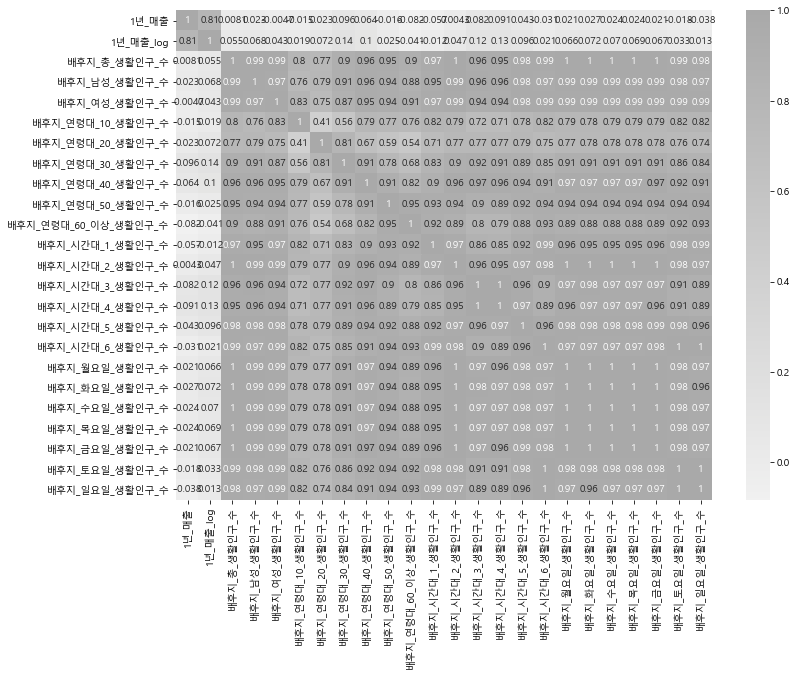

In [41]:
plt.rcParams['font.family'] = 'Malgun Gothic'
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(df_all.corr(), annot=True, cmap=cmap)
plt.show()

In [26]:
df_all.isnull().sum()

1년_매출                   0
1년_매출_log               0
배후지_총_생활인구_수            0
배후지_남성_생활인구_수           0
배후지_여성_생활인구_수           0
배후지_연령대_10_생활인구_수       0
배후지_연령대_20_생활인구_수       0
배후지_연령대_30_생활인구_수       0
배후지_연령대_40_생활인구_수       0
배후지_연령대_50_생활인구_수       0
배후지_연령대_60_이상_생활인구_수    0
배후지_시간대_1_생활인구_수        0
배후지_시간대_2_생활인구_수        0
배후지_시간대_3_생활인구_수        0
배후지_시간대_4_생활인구_수        0
배후지_시간대_5_생활인구_수        0
배후지_시간대_6_생활인구_수        0
배후지_월요일_생활인구_수          0
배후지_화요일_생활인구_수          0
배후지_수요일_생활인구_수          0
배후지_목요일_생활인구_수          0
배후지_금요일_생활인구_수          0
배후지_토요일_생활인구_수          0
배후지_일요일_생활인구_수          0
dtype: int64

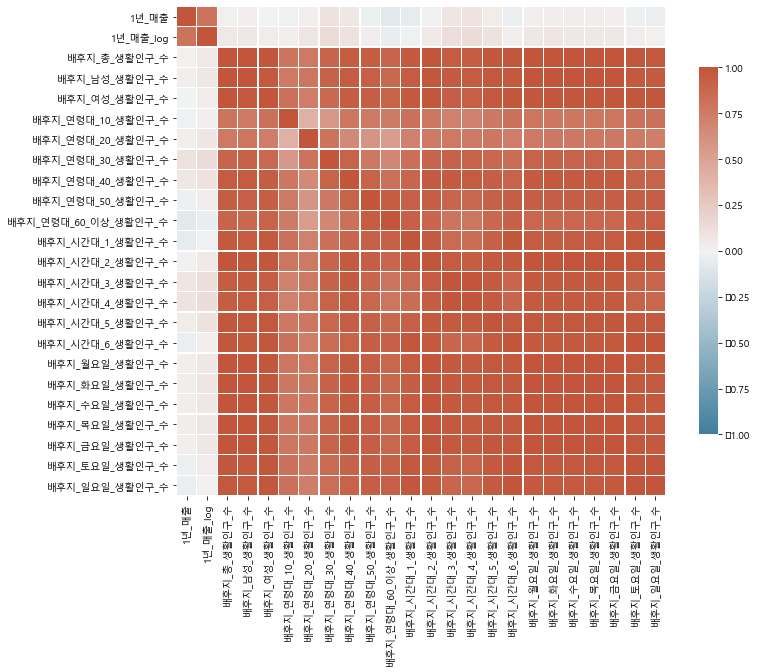

In [43]:
get_VIF(df_all)

In [35]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X = df_all.iloc[:,2:]
# df_all_stan = s_scaler.fit_transform(X)

In [30]:
X = df_all_stan

In [36]:
y = get_Standard(df_all['1년_매출'])
y

array([[-0.2922061 ],
       [-0.24899548],
       [ 0.38558882],
       ...,
       [ 0.08330178],
       [-0.61172899],
       [-0.43157827]])

In [37]:
get_summary(X,y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     8.000
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.27e-23
Time:                        23:07:59   Log-Likelihood:                -1348.8
No. Observations:                1009   AIC:                             2744.
Df Residuals:                     986   BIC:                             2857.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2073 

In [33]:
X

array([[-1.80741489, -1.78237961, -1.80791673, ..., -1.78679455,
        -1.85022476, -1.84364542],
       [-0.47057348, -0.35606267, -0.56433413, ..., -0.46025318,
        -0.50581359, -0.50955669],
       [-1.46739968, -1.28719127, -1.60642552, ..., -1.40770869,
        -1.54332573, -1.64925941],
       ...,
       [ 1.41812   ,  1.30840978,  1.49660264, ...,  1.40757904,
         1.52150629,  1.45282768],
       [ 2.1760774 ,  2.03972063,  2.26876954, ...,  2.16575352,
         2.20720752,  2.17670595],
       [ 2.62527154,  2.56270128,  2.64872063, ...,  2.57420391,
         2.69507938,  2.73920484]])

In [79]:
from sklearn.cluster import KMeans

for i in range(3,10):
    k_m = KMeans(n_clusters=i)
    k_m.fit(X)
    df_all[str(i)+'cluster'] = k_m.labels_



In [80]:
df_all

,상권_코드,1년_매출,배후지_총_생활인구_수,1년_평균_점포_수,총_생활인구_수,3cluster,4cluster,5cluster,6cluster,7cluster,8cluster,9cluster
0,1000001,1.512657e+10,1081142.00,658.75,297154.75,1,2,1,3,6,7,1
1,1000002,1.599466e+10,3643150.75,1394.25,340719.75,2,1,3,1,2,2,7
2,1000003,2.874329e+10,1732769.00,3158.75,172097.25,2,1,3,1,1,1,1
3,1000004,1.072206e+10,3164952.75,228.75,649737.50,1,0,1,3,6,7,2
4,1000005,1.043475e+10,460215.00,197.00,171360.00,1,2,4,4,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1001006,1.250092e+10,5769453.25,705.00,913474.00,0,0,0,5,4,3,6
1006,1001007,1.723727e+10,1411216.75,456.00,462997.50,1,2,1,3,6,7,2
1007,1001008,2.267043e+10,7262764.25,1746.25,714152.00,0,3,2,0,5,0,8
1008,1001009,8.707442e+09,8715362.50,1374.75,2213051.75,0,3,2,0,0,6,3


In [83]:
df_all.iloc[:,5:].groupby(['3cluster','4cluster','5cluster','6cluster']).count()

7cluster  8cluster  9cluster
3cluster 4cluster 5cluster 6cluster                              
0        0        0        2                2         2         2
                           5              146       146       146
         3        0        2               13        13        13
                           5               37        37        37
                  2        0              216       216       216
                           2               45        45        45
                           5               12        12        12
1        0        0        3                2         2         2
                  1        3               31        31        31
         1        1        1                1         1         1
                           3                2         2         2
         2        1        1               18        18        18
                           3               79        79        79
                  3        1                3         3         3
                  4        4               15        15        15
2        0        0        2               23        23        23
                           3               18        18        18
                           5               39        39        39
                  1        3               17        17        17
         1        0        2               25        25        25
                  1        1                3         3         3
                           3               14        14        14
                  3        1               86        86        86
                           2              152       152       152
                           3                2         2         2
         3        0        2                1         1         1
                  2        2                6         6         6
                  3        2                2         2         2

## 점포의 수

In [38]:
bs_behind_mart = pd.read_csv('data/seoul_raw/서울시 우리마을가게 상권분석서비스(상권배후지-점포).csv', encoding = 'cp949')
condition_2021_12 = bs_behind_mart['기준_년_코드']==2021
condition_2020_34 = (bs_behind_mart['기준_년_코드']==2020 ) & ((bs_behind_mart['기준_분기_코드'] == 3) | (bs_behind_mart['기준_분기_코드'] == 4))
bs_mart_recent = bs_behind_mart[condition_2021_12 | condition_2020_34]
bs_점포 = bs_mart_recent.groupby(['상권_코드','기준_분기_코드']).sum()['점포_수'].unstack().agg(np.mean, axis=1).to_frame().reset_index()
bs_점포 = get_object_type(bs_점포)
bs_점포.columns = ['상권_코드', '1년_평균_점포_수']
# bs_점포


In [39]:
df_all = pd.merge(left=df_all, right=bs_점포, on='상권_코드', how='left')
# df_all

,상권_코드,1년_매출,배후지_총_생활인구_수,1년_평균_점포_수
0,1000001,1.512657e+10,1081142.00,658.75
1,1000002,1.599466e+10,3643150.75,1394.25
2,1000003,2.874329e+10,1732769.00,3158.75
3,1000004,1.072206e+10,3164952.75,228.75
4,1000005,1.043475e+10,460215.00,197.00
...,...,...,...,...
1005,1001006,1.250092e+10,5769453.25,705.00
1006,1001007,1.723727e+10,1411216.75,456.00
1007,1001008,2.267043e+10,7262764.25,1746.25
1008,1001009,8.707442e+09,8715362.50,1374.75


## 일반 생활인구_수

In [42]:
df_pop = pd.read_csv('data/my_result/상권인구.csv')
df_pop = get_object_type(df_pop)
# df_pop

,상권_코드,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,남성_생활인구_수_총인구대비_비율,여성_생활인구_수_총인구대비_비율,연령대_10_생활인구_수_총인구대비_비율,연령대_20_생활인구_수_총인구대비_비율,연령대_30_생활인구_수_총인구대비_비율,연령대_40_생활인구_수_총인구대비_비율,연령대_50_생활인구_수_총인구대비_비율,연령대_60_이상_생활인구_수_총인구대비_비율,시간대_1_생활인구_수_총인구대비_비율,시간대_2_생활인구_수_총인구대비_비율,시간대_3_생활인구_수_총인구대비_비율,시간대_4_생활인구_수_총인구대비_비율,시간대_5_생활인구_수_총인구대비_비율,시간대_6_생활인구_수_총인구대비_비율,월요일_생활인구_수_총인구대비_비율,화요일_생활인구_수_총인구대비_비율,수요일_생활인구_수_총인구대비_비율,목요일_생활인구_수_총인구대비_비율,금요일_생활인구_수_총인구대비_비율,토요일_생활인구_수_총인구대비_비율,일요일_생활인구_수_총인구대비_비율
0,1000001,297154.75,150236.00,146919.25,38916.25,41428.50,55735.00,61284.00,45201.25,54590.75,52028.25,68356.75,50704.75,49721.50,48513.50,27830.25,45076.00,46535.75,45815.75,45784.25,44657.50,35829.50,33457.25,0.505582,0.494420,0.130963,0.139417,0.187562,0.206236,0.152114,0.183712,0.175088,0.230038,0.170634,0.167325,0.163260,0.093656,0.151692,0.156604,0.154181,0.154075,0.150284,0.120575,0.112592
1,1000002,340719.75,173492.50,167227.50,17662.25,64561.75,63913.75,55866.00,56350.75,82364.75,77040.75,71486.25,53600.25,54148.00,50016.75,34427.25,48204.00,48883.50,49025.75,48514.25,48383.25,48353.75,49355.50,0.509194,0.490807,0.051838,0.189486,0.187585,0.163965,0.165387,0.241738,0.226112,0.209810,0.157315,0.158922,0.146797,0.101043,0.141477,0.143471,0.143889,0.142388,0.142003,0.141916,0.144857
2,1000003,172097.25,95427.50,76670.00,9758.00,33843.50,34843.50,32501.50,27144.50,34006.00,24945.50,32342.50,31752.00,33943.25,34684.00,14429.25,25010.50,26379.50,26451.25,26201.25,26066.75,22810.75,19176.25,0.554498,0.445504,0.056700,0.196653,0.202464,0.188855,0.157728,0.197598,0.144950,0.187932,0.184500,0.197233,0.201537,0.083844,0.145328,0.153283,0.153699,0.152247,0.151465,0.132546,0.111427
3,1000004,649737.50,309657.75,340080.75,88784.75,247350.75,65090.25,71017.25,62110.25,115384.75,187571.00,138146.25,74470.75,71997.50,94787.00,82766.25,93280.00,93563.25,93711.50,93328.00,91141.25,91739.75,92975.25,0.476589,0.523413,0.136647,0.380693,0.100179,0.109301,0.095593,0.177587,0.288687,0.212619,0.114617,0.110810,0.145885,0.127384,0.143566,0.144002,0.144230,0.143640,0.140274,0.141195,0.143097
4,1000005,171360.00,79995.25,91364.25,22976.50,20760.00,21208.00,31325.00,28611.00,46479.50,50426.00,36481.75,19005.50,18278.75,25119.75,22047.50,23790.00,23924.75,24121.50,23923.75,24178.00,25538.00,25882.25,0.466826,0.533171,0.134083,0.121148,0.123763,0.182802,0.166964,0.271239,0.294269,0.212895,0.110910,0.106669,0.146591,0.128662,0.138831,0.139617,0.140765,0.139611,0.141095,0.149031,0.151040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1001486,66276.75,30238.00,36039.00,6036.25,10010.50,11330.50,9848.00,10793.75,18257.50,14496.50,12525.25,8842.25,9703.75,12758.00,7951.00,9364.25,9422.25,9479.25,9417.50,9535.75,9718.25,9339.50,0.456238,0.543765,0.091076,0.151041,0.170957,0.148589,0.162859,0.275474,0.218727,0.188984,0.133414,0.146413,0.192496,0.119967,0.141290,0.142165,0.143025,0.142094,0.143878,0.146631,0.140917
1486,1001487,90614.75,40700.50,49915.25,7376.25,16282.00,15828.00,14175.75,15322.25,21631.00,13586.75,15602.50,13940.00,16233.25,21096.00,10156.50,12637.50,12898.00,12992.25,12788.00,13181.50,13592.50,12526.25,0.449160,0.550851,0.081402,0.179684,0.174674,0.156440,0.169092,0.238714,0.149940,0.172185,0.153838,0.179146,0.232810,0.112084,0.139464,0.142339,0.143379,0.141125,0.145467,0.150003,0.138236
1487,1001488,634064.75,289506.75,344557.50,101916.75,73690.25,98169.75,99795.75,94304.00,166188.00,163143.50,126135.25,74277.75,76954.25,112480.75,81072.50,87690.00,86981.25,87618.50,87696.50,87125.25,96268.75,100683.50,0.456589,0.543411,0.160736,0.116219,0.154826,0.157390,0.148729,0.262099,0.257298,0.19

In [41]:
df_all = pd.merge(left=df_all, right=df_pop.iloc[:,:2], on='상권_코드', how='left')
# df_all

,상권_코드,1년_매출,배후지_총_생활인구_수,1년_평균_점포_수,총_생활인구_수
0,1000001,1.512657e+10,1081142.00,658.75,297154.75
1,1000002,1.599466e+10,3643150.75,1394.25,340719.75
2,1000003,2.874329e+10,1732769.00,3158.75,172097.25
3,1000004,1.072206e+10,3164952.75,228.75,649737.50
4,1000005,1.043475e+10,460215.00,197.00,171360.00
...,...,...,...,...,...
1005,1001006,1.250092e+10,5769453.25,705.00,913474.00
1006,1001007,1.723727e+10,1411216.75,456.00,462997.50
1007,1001008,2.267043e+10,7262764.25,1746.25,714152.00
1008,1001009,8.707442e+09,8715362.50,1374.75,2213051.75


In [5]:
file_path= ''
df_apt = pd.read_csv('data/my_result/상권건물.csv')
df_apt = get_object_type(df_apt)
df_apt_b = pd.read_csv('data/my_result/상권건물_배후지.csv')
df_apt_b = get_object_type(df_apt_b)

df_pop = pd.read_csv('data/my_result/상권인구.csv')
df_pop = get_object_type(df_pop)
df_pop_b = pd.read_csv('data/my_result/상권인구_배후지.csv')
df_pop_b = get_object_type(df_pop_b)

df_pop_best50 = pd.read_csv('data/my_result/상권인구best50.csv')
df_pop_best50 = get_object_type(df_pop_best50)

In [15]:
df_rev

,상권_코드,1년_매출,1년_매출_log
0,1000001,1.512657e+10,23.439719
1,1000002,1.599466e+10,23.495521
2,1000003,2.874329e+10,24.081670
3,1000004,1.072206e+10,23.095569
4,1000005,1.043475e+10,23.068407
...,...,...,...
1475,1001486,7.502853e+09,22.738549
1476,1001487,1.325915e+10,23.307954
1477,1001488,1.784020e+10,23.604720
1478,1001489,6.838972e+10,24.948488


## target load

In [8]:
df_t_total = pd.read_csv('data/j_result/매출_회귀계수.csv')
df_t_total = get_object_type(df_t_total)

df_t_total_log = pd.read_csv('data/j_result/매출_회귀계수_log.csv')
df_t_total_log = get_object_type(df_t_total_log)

df_t_food = pd.read_csv('data/j_result/음식_회귀계수.csv')
df_t_food = get_object_type(df_t_food)

df_t_weekend = pd.read_csv('data/j_result/주말_회귀계수.csv')
df_t_weekend = get_object_type(df_t_weekend)

## data 준비

In [9]:
bs_area = gpd.read_file('data/geojson/상권_geometry_좌표.geojson', driver= 'GeoJSON')
bs_area= bs_area[bs_area['TRDAR_SE_C']== 'A']
df_base = bs_area[['TRDAR_CD','TRDAR_SE_1']].sort_values('TRDAR_CD').reset_index(drop=True)
df_base.columns = ['상권_코드', '상권_이름']
df_base = get_object_type(df_base)
df_base.head()

,상권_코드
0,1000001
1,1000002
2,1000003
3,1000004
4,1000005


### 타겟 병합

In [10]:
df_t_total_log.head(3)

,상권_코드,coef
0,1000001,-0.018826
1,1000002,-0.061388
2,1000003,-0.032694


In [11]:
df_t_total_log.describe()

,coef
count,1479.000000
mean,-0.014974
std,0.065453
min,-0.403134
25%,-0.042622
50%,-0.018948
75%,0.004326
max,1.142864


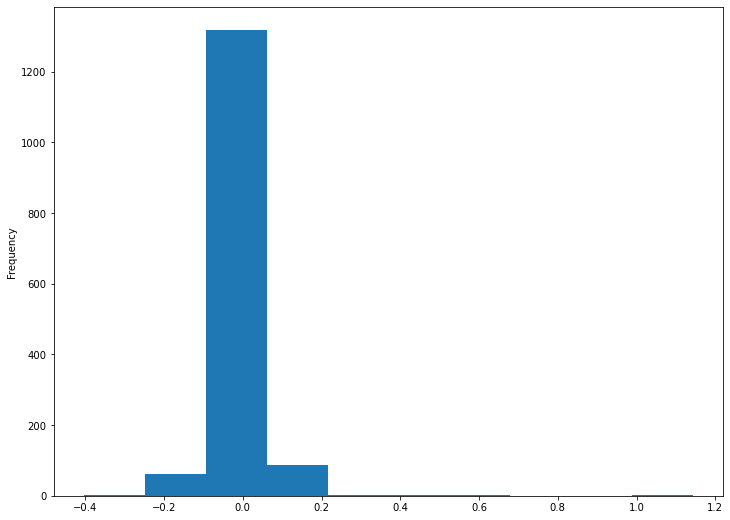

In [12]:
df_t_total_log['coef'].plot(kind='hist');

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
s_scaler=StandardScaler()
m_scaler=MinMaxScaler()

In [12]:
df_t_total_log['coef'] = s_scaler.fit_transform(np.array(df_t_total_log['coef']).reshape(-1,1))

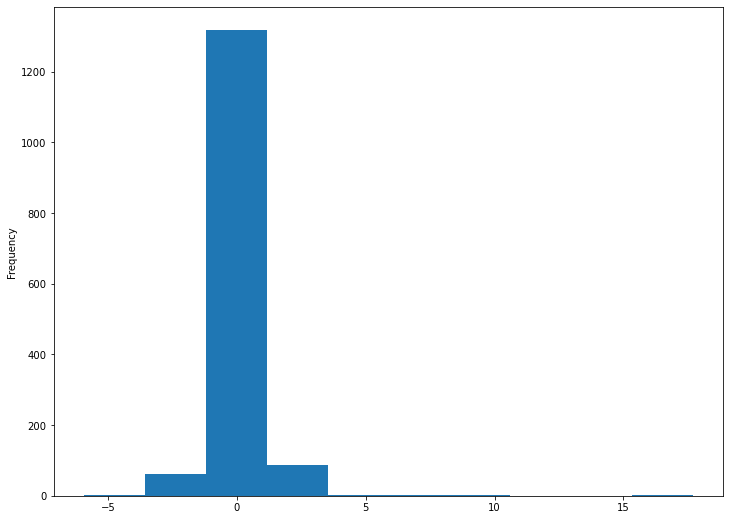

In [13]:
df_t_total_log['coef'].plot(kind='hist');

In [14]:
df_t_total_log[df_t_total_log['coef']>15]

,상권_코드,coef
1427,1001428,17.695667


In [15]:
# 이상치 제거
df_t_total_log.drop(1427, inplace=True)

In [16]:
df_t_total_log['coef'] = m_scaler.fit_transform(np.array(df_t_total_log['coef']).reshape(-1,1))

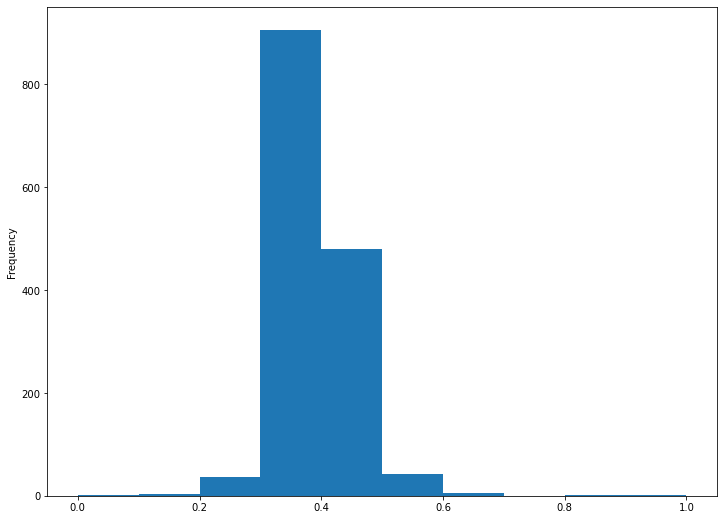

In [17]:
df_t_total_log['coef'].plot(kind='hist');

In [18]:
df_all = df_base.copy()


In [19]:
df_all = pd.merge(left=df_all, right=df_t_total_log, on='상권_코드', how='left')
df_all

,상권_코드,coef
0,1000001,0.388457
1,1000002,0.345436
2,1000003,0.374439
3,1000004,0.362639
4,1000005,0.365323
...,...,...
1005,1001006,0.366531
1006,1001007,0.410207
1007,1001008,0.369909
1008,1001009,0.332554


### 설명 변수 병합

설명 변수 유효해 보이는 비율만 찾아서 머지해보자규~

In [20]:
file_path= ''
df_apt = pd.read_csv('data/my_result/상권건물.csv')
df_apt = get_object_type(df_apt)
df_apt_b = pd.read_csv('data/my_result/상권건물_배후지.csv')
df_apt_b = get_object_type(df_apt_b)

df_pop = pd.read_csv('data/my_result/상권인구.csv')
df_pop = get_object_type(df_pop)
df_pop_b = pd.read_csv('data/my_result/상권인구_배후지.csv')
df_pop_b = get_object_type(df_pop_b)

df_pop_best50 = pd.read_csv('data/my_result/상권인구best50.csv')
df_pop_best50 = get_object_type(df_pop_best50)

# 아파트 배후지만 넣고, 전부 민맥스로 변환 한다. standard and minmax로

In [21]:
df_apt_b.dropna(inplace=True, axis=0)

In [22]:
df_apt_b

,상권_코드,배후지_아파트_단지_수,배후지_아파트_면적_66_제곱미터_미만_세대_수,배후지_아파트_면적_66_제곱미터_세대_수,배후지_아파트_면적_99_제곱미터_세대_수,배후지_아파트_면적_132_제곱미터_세대_수,배후지_아파트_면적_165_제곱미터_세대_수,배후지_아파트_가격_1_억_미만_세대_수,배후지_아파트_가격_1_억_세대_수,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_가격_4_억_세대_수,배후지_아파트_가격_5_억_세대_수,배후지_아파트_가격_6_억_이상_세대_수,배후지_아파트_평균_면적,배후지_아파트_평균_시가,배후지_아파트_면적_66_제곱미터_미만_세대_수_세대수_비율,배후지_아파트_면적_66_제곱미터_세대_수_세대수_비율,배후지_아파트_면적_99_제곱미터_세대_수_세대수_비율,배후지_아파트_면적_132_제곱미터_세대_수_세대수_비율,배후지_아파트_면적_165_제곱미터_세대_수_세대수_비율,배후지_아파트_가격_1_억_미만_세대_수_세대수_비율,배후지_아파트_가격_1_억_세대_수_세대수_비율,배후지_아파트_가격_2_억_세대_수_세대수_비율,배후지_아파트_가격_3_억_세대_수_세대수_비율,배후지_아파트_가격_4_억_세대_수_세대수_비율,배후지_아파트_가격_5_억_세대_수_세대수_비율,배후지_아파트_가격_6_억_이상_세대_수_세대수_비율
0,1000001,136.00,729.50,95.25,24.0,8.00,50.0,171.25,528.75,101.25,35.50,8.75,5.25,56.00,68.00,2.552432e+08,0.804522,0.105045,0.026468,0.008823,0.055142,0.188861,0.583127,0.111663,0.039151,0.009650,0.005790,0.061759
1,1000002,44.75,1710.00,1202.75,370.0,0.00,0.0,704.00,389.00,175.75,420.75,847.25,529.75,216.25,49.75,2.283580e+08,0.520905,0.366385,0.112710,0.000000,0.000000,0.214454,0.118498,0.053537,0.128170,0.258092,0.161374,0.065875
2,1000003,8.00,390.00,144.00,55.0,1.00,2.0,20.25,225.25,307.50,38.75,0.25,0.00,0.00,50.00,1.777366e+08,0.658784,0.243243,0.092905,0.001689,0.003378,0.034206,0.380490,0.519426,0.065456,0.000422,0.000000,0.000000
3,1000004,229.25,1239.50,387.25,59.5,22.25,16.0,665.50,522.75,302.75,153.50,49.00,21.00,10.00,58.00,1.484796e+08,0.718759,0.224558,0.034503,0.012902,0.009278,0.385909,0.303131,0.175558,0.089011,0.028414,0.012177,0.005799
4,1000005,105.25,241.00,479.00,105.0,92.00,192.0,63.00,239.50,368.50,105.75,80.75,27.75,223.75,102.00,3.375490e+08,0.217313,0.431921,0.094680,0.082958,0.173129,0.056808,0.215960,0.332281,0.095356,0.072813,0.025023,0.201758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1001006,213.25,2599.75,2974.00,725.0,82.00,17.0,460.75,1194.50,853.50,1491.00,1526.00,589.25,282.75,59.75,2.209725e+08,0.406354,0.464851,0.113321,0.012817,0.002657,0.072018,0.186706,0.133406,0.233051,0.238521,0.092103,0.044195
1006,1001007,94.25,725.50,116.00,0.0,0.00,0.0,66.25,502.25,197.00,76.00,0.00,0.00,0.00,47.00,1.545860e+08,0.862151,0.137849,0.000000,0.000000,0.000000,0.078728,0.596851,0.234106,0.090315,0.000000,0.000000,0.000000
1007,1001008,147.50,1456.00,579.00,46.0,3.00,0.0,139.75,832.75,420.50,321.25,358.75,11.00,0.00,48.50,1.854066e+08,0.698656,0.277831,0.022073,0.001440,0.000000,0.067059,0.399592,0.201775,0.154151,0.172145,0.005278,0.000000
1008,1001009,191.25,2289.75,1405.00,316.0,9.00,0.0,206.00,902.75,530.25,972.25,727.50,569.50,111.50,51.00,2.026863e+08,0.569625,0.349524,0.078612,0.002239,0.000000,0.051247,0.224579,0.131911,0.241868,0.180981,0.141675,0.027738


In [23]:
for i, j in enumerate(df_apt_b.columns):
    print(i, j)

0 상권_코드
1 배후지_아파트_단지_수
2 배후지_아파트_면적_66_제곱미터_미만_세대_수
3 배후지_아파트_면적_66_제곱미터_세대_수
4 배후지_아파트_면적_99_제곱미터_세대_수
5 배후지_아파트_면적_132_제곱미터_세대_수
6 배후지_아파트_면적_165_제곱미터_세대_수
7 배후지_아파트_가격_1_억_미만_세대_수
8 배후지_아파트_가격_1_억_세대_수
9 배후지_아파트_가격_2_억_세대_수
10 배후지_아파트_가격_3_억_세대_수
11 배후지_아파트_가격_4_억_세대_수
12 배후지_아파트_가격_5_억_세대_수
13 배후지_아파트_가격_6_억_이상_세대_수
14 배후지_아파트_평균_면적
15 배후지_아파트_평균_시가
16 배후지_아파트_면적_66_제곱미터_미만_세대_수_세대수_비율
17 배후지_아파트_면적_66_제곱미터_세대_수_세대수_비율
18 배후지_아파트_면적_99_제곱미터_세대_수_세대수_비율
19 배후지_아파트_면적_132_제곱미터_세대_수_세대수_비율
20 배후지_아파트_면적_165_제곱미터_세대_수_세대수_비율
21 배후지_아파트_가격_1_억_미만_세대_수_세대수_비율
22 배후지_아파트_가격_1_억_세대_수_세대수_비율
23 배후지_아파트_가격_2_억_세대_수_세대수_비율
24 배후지_아파트_가격_3_억_세대_수_세대수_비율
25 배후지_아파트_가격_4_억_세대_수_세대수_비율
26 배후지_아파트_가격_5_억_세대_수_세대수_비율
27 배후지_아파트_가격_6_억_이상_세대_수_세대수_비율


In [24]:
df_apt_sel_trans = pd.DataFrame()
for i, j in enumerate(df_apt_b.columns):
    if i in [0,16,17,18,21,22,23]:
        df_apt_sel_trans[j] = df_apt_b[j]
    elif i in [1,2,3,4,5,7,8,9,10,14]:
        df_apt_sel_trans[j] = m_scaler.fit_transform(np.array(df_apt_b[j]).reshape(-1,1))
        
    elif i in [15]:
        df_apt_sel_trans[j] = m_scaler.fit_transform(np.array(df_apt_b[j].agg(np.log1p)).reshape(-1,1))
    
    else:
        pass


In [25]:
df_apt_sel_trans

,상권_코드,배후지_아파트_단지_수,배후지_아파트_면적_66_제곱미터_미만_세대_수,배후지_아파트_면적_66_제곱미터_세대_수,배후지_아파트_면적_99_제곱미터_세대_수,배후지_아파트_면적_132_제곱미터_세대_수,배후지_아파트_가격_1_억_미만_세대_수,배후지_아파트_가격_1_억_세대_수,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_평균_면적,배후지_아파트_평균_시가,배후지_아파트_면적_66_제곱미터_미만_세대_수_세대수_비율,배후지_아파트_면적_66_제곱미터_세대_수_세대수_비율,배후지_아파트_면적_99_제곱미터_세대_수_세대수_비율,배후지_아파트_가격_1_억_미만_세대_수_세대수_비율,배후지_아파트_가격_1_억_세대_수_세대수_비율,배후지_아파트_가격_2_억_세대_수_세대수_비율
0,1000001,0.122616,0.077689,0.017657,0.012358,0.006762,0.039826,0.064711,0.021024,0.010803,0.305019,0.385491,0.804522,0.105045,0.026468,0.188861,0.583127,0.111663
1,1000002,0.039737,0.182109,0.226245,0.190525,0.000000,0.163721,0.047607,0.036493,0.128043,0.164093,0.346608,0.520905,0.366385,0.112710,0.214454,0.118498,0.053537
2,1000003,0.006358,0.041534,0.026839,0.028321,0.000845,0.004709,0.027567,0.063850,0.011792,0.166023,0.259057,0.658784,0.243243,0.092905,0.034206,0.380490,0.519426
3,1000004,0.207312,0.132002,0.072653,0.030639,0.018808,0.154767,0.063976,0.062863,0.046713,0.227799,0.196224,0.718759,0.224558,0.034503,0.385909,0.303131,0.175558
4,1000005,0.094687,0.025666,0.089933,0.054068,0.077768,0.014651,0.029311,0.076516,0.032182,0.567568,0.483132,0.217313,0.431921,0.094680,0.056808,0.215960,0.332281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1001006,0.192779,0.276864,0.559846,0.373326,0.069315,0.107151,0.146188,0.177222,0.453743,0.241313,0.335122,0.406354,0.464851,0.113321,0.072018,0.186706,0.133406
1006,1001007,0.084696,0.077263,0.021565,0.000000,0.000000,0.015407,0.061467,0.040905,0.023128,0.142857,0.210304,0.862151,0.137849,0.000000,0.078728,0.596851,0.234106
1007,1001008,0.133061,0.155059,0.108767,0.023687,0.002536,0.032500,0.101915,0.087313,0.097763,0.154440,0.273816,0.698656,0.277831,0.022073,0.067059,0.399592,0.201775
1008,1001009,0.172797,0.243850,0.264338,0.162719,0.007608,0.047907,0.110482,0.110102,0.295876,0.173745,0.304946,0.569625,0.349524,0.078612,0.051247,0.224579,0.131911


In [26]:
df_all = pd.merge(left=df_all, right=df_apt_sel_trans, on='상권_코드', how='left')

In [27]:
df_all

,상권_코드,coef,배후지_아파트_단지_수,배후지_아파트_면적_66_제곱미터_미만_세대_수,배후지_아파트_면적_66_제곱미터_세대_수,배후지_아파트_면적_99_제곱미터_세대_수,배후지_아파트_면적_132_제곱미터_세대_수,배후지_아파트_가격_1_억_미만_세대_수,배후지_아파트_가격_1_억_세대_수,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_평균_면적,배후지_아파트_평균_시가,배후지_아파트_면적_66_제곱미터_미만_세대_수_세대수_비율,배후지_아파트_면적_66_제곱미터_세대_수_세대수_비율,배후지_아파트_면적_99_제곱미터_세대_수_세대수_비율,배후지_아파트_가격_1_억_미만_세대_수_세대수_비율,배후지_아파트_가격_1_억_세대_수_세대수_비율,배후지_아파트_가격_2_억_세대_수_세대수_비율
0,1000001,0.388457,0.122616,0.077689,0.017657,0.012358,0.006762,0.039826,0.064711,0.021024,0.010803,0.305019,0.385491,0.804522,0.105045,0.026468,0.188861,0.583127,0.111663
1,1000002,0.345436,0.039737,0.182109,0.226245,0.190525,0.000000,0.163721,0.047607,0.036493,0.128043,0.164093,0.346608,0.520905,0.366385,0.112710,0.214454,0.118498,0.053537
2,1000003,0.374439,0.006358,0.041534,0.026839,0.028321,0.000845,0.004709,0.027567,0.063850,0.011792,0.166023,0.259057,0.658784,0.243243,0.092905,0.034206,0.380490,0.519426
3,1000004,0.362639,0.207312,0.132002,0.072653,0.030639,0.018808,0.154767,0.063976,0.062863,0.046713,0.227799,0.196224,0.718759,0.224558,0.034503,0.385909,0.303131,0.175558
4,1000005,0.365323,0.094687,0.025666,0.089933,0.054068,0.077768,0.014651,0.029311,0.076516,0.032182,0.567568,0.483132,0.217313,0.431921,0.094680,0.056808,0.215960,0.332281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1001006,0.366531,0.192779,0.276864,0.559846,0.373326,0.069315,0.107151,0.146188,0.177222,0.453743,0.241313,0.335122,0.406354,0.464851,0.113321,0.072018,0.186706,0.133406
1006,1001007,0.410207,0.084696,0.077263,0.021565,0.000000,0.000000,0.015407,0.061467,0.040905,0.023128,0.142857,0.210304,0.862151,0.137849,0.000000,0.078728,0.596851,0.234106
1007,1001008,0.369909,0.133061,0.155059,0.108767,0.023687,0.002536,0.032500,0.101915,0.087313,0.097763,0.154440,0.273816,0.698656,0.277831,0.022073,0.067059,0.399592,0.201775
1008,1001009,0.332554,0.172797,0.243850,0.264338,0.162719,0.007608,0.047907,0.110482,0.110102,0.295876,0.173745,0.304946,0.569625,0.349524,0.078612,0.051247,0.224579,0.131911


In [28]:
df_all.shape

(1010, 19)

In [29]:
df_all.head(3)

,상권_코드,coef,배후지_아파트_단지_수,배후지_아파트_면적_66_제곱미터_미만_세대_수,배후지_아파트_면적_66_제곱미터_세대_수,배후지_아파트_면적_99_제곱미터_세대_수,배후지_아파트_면적_132_제곱미터_세대_수,배후지_아파트_가격_1_억_미만_세대_수,배후지_아파트_가격_1_억_세대_수,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_평균_면적,배후지_아파트_평균_시가,배후지_아파트_면적_66_제곱미터_미만_세대_수_세대수_비율,배후지_아파트_면적_66_제곱미터_세대_수_세대수_비율,배후지_아파트_면적_99_제곱미터_세대_수_세대수_비율,배후지_아파트_가격_1_억_미만_세대_수_세대수_비율,배후지_아파트_가격_1_억_세대_수_세대수_비율,배후지_아파트_가격_2_억_세대_수_세대수_비율
0,1000001,0.388457,0.122616,0.077689,0.017657,0.012358,0.006762,0.039826,0.064711,0.021024,0.010803,0.305019,0.385491,0.804522,0.105045,0.026468,0.188861,0.583127,0.111663
1,1000002,0.345436,0.039737,0.182109,0.226245,0.190525,0.000000,0.163721,0.047607,0.036493,0.128043,0.164093,0.346608,0.520905,0.366385,0.112710,0.214454,0.118498,0.053537
2,1000003,0.374439,0.006358,0.041534,0.026839,0.028321,0.000845,0.004709,0.027567,0.063850,0.011792,0.166023,0.259057,0.658784,0.243243,0.092905,0.034206,0.380490,0.519426


In [30]:
df_all.dropna(inplace=True, axis=0)

In [31]:
df_all.shape

(1008, 19)

In [32]:
df_all

,상권_코드,coef,배후지_아파트_단지_수,배후지_아파트_면적_66_제곱미터_미만_세대_수,배후지_아파트_면적_66_제곱미터_세대_수,배후지_아파트_면적_99_제곱미터_세대_수,배후지_아파트_면적_132_제곱미터_세대_수,배후지_아파트_가격_1_억_미만_세대_수,배후지_아파트_가격_1_억_세대_수,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_평균_면적,배후지_아파트_평균_시가,배후지_아파트_면적_66_제곱미터_미만_세대_수_세대수_비율,배후지_아파트_면적_66_제곱미터_세대_수_세대수_비율,배후지_아파트_면적_99_제곱미터_세대_수_세대수_비율,배후지_아파트_가격_1_억_미만_세대_수_세대수_비율,배후지_아파트_가격_1_억_세대_수_세대수_비율,배후지_아파트_가격_2_억_세대_수_세대수_비율
0,1000001,0.388457,0.122616,0.077689,0.017657,0.012358,0.006762,0.039826,0.064711,0.021024,0.010803,0.305019,0.385491,0.804522,0.105045,0.026468,0.188861,0.583127,0.111663
1,1000002,0.345436,0.039737,0.182109,0.226245,0.190525,0.000000,0.163721,0.047607,0.036493,0.128043,0.164093,0.346608,0.520905,0.366385,0.112710,0.214454,0.118498,0.053537
2,1000003,0.374439,0.006358,0.041534,0.026839,0.028321,0.000845,0.004709,0.027567,0.063850,0.011792,0.166023,0.259057,0.658784,0.243243,0.092905,0.034206,0.380490,0.519426
3,1000004,0.362639,0.207312,0.132002,0.072653,0.030639,0.018808,0.154767,0.063976,0.062863,0.046713,0.227799,0.196224,0.718759,0.224558,0.034503,0.385909,0.303131,0.175558
4,1000005,0.365323,0.094687,0.025666,0.089933,0.054068,0.077768,0.014651,0.029311,0.076516,0.032182,0.567568,0.483132,0.217313,0.431921,0.094680,0.056808,0.215960,0.332281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1001006,0.366531,0.192779,0.276864,0.559846,0.373326,0.069315,0.107151,0.146188,0.177222,0.453743,0.241313,0.335122,0.406354,0.464851,0.113321,0.072018,0.186706,0.133406
1006,1001007,0.410207,0.084696,0.077263,0.021565,0.000000,0.000000,0.015407,0.061467,0.040905,0.023128,0.142857,0.210304,0.862151,0.137849,0.000000,0.078728,0.596851,0.234106
1007,1001008,0.369909,0.133061,0.155059,0.108767,0.023687,0.002536,0.032500,0.101915,0.087313,0.097763,0.154440,0.273816,0.698656,0.277831,0.022073,0.067059,0.399592,0.201775
1008,1001009,0.332554,0.172797,0.243850,0.264338,0.162719,0.007608,0.047907,0.110482,0.110102,0.295876,0.173745,0.304946,0.569625,0.349524,0.078612,0.051247,0.224579,0.131911


# pop 인구 정보를 넣어 볼까나?!

In [33]:
df_pop_b.dropna(inplace=True, axis=0)
df_pop_b

,상권_코드,배후지_총_생활인구_수,배후지_남성_생활인구_수,배후지_여성_생활인구_수,배후지_연령대_10_생활인구_수,배후지_연령대_20_생활인구_수,배후지_연령대_30_생활인구_수,배후지_연령대_40_생활인구_수,배후지_연령대_50_생활인구_수,배후지_연령대_60_이상_생활인구_수,배후지_시간대_1_생활인구_수,배후지_시간대_2_생활인구_수,배후지_시간대_3_생활인구_수,배후지_시간대_4_생활인구_수,배후지_시간대_5_생활인구_수,배후지_시간대_6_생활인구_수,배후지_월요일_생활인구_수,배후지_화요일_생활인구_수,배후지_수요일_생활인구_수,배후지_목요일_생활인구_수,배후지_금요일_생활인구_수,배후지_토요일_생활인구_수,배후지_일요일_생활인구_수,배후지_남성_생활인구_수_총인구대비_비율,배후지_여성_생활인구_수_총인구대비_비율,배후지_연령대_10_생활인구_수_총인구대비_비율,배후지_연령대_20_생활인구_수_총인구대비_비율,배후지_연령대_30_생활인구_수_총인구대비_비율,배후지_연령대_40_생활인구_수_총인구대비_비율,배후지_연령대_50_생활인구_수_총인구대비_비율,배후지_연령대_60_이상_생활인구_수_총인구대비_비율,배후지_시간대_1_생활인구_수_총인구대비_비율,배후지_시간대_2_생활인구_수_총인구대비_비율,배후지_시간대_3_생활인구_수_총인구대비_비율,배후지_시간대_4_생활인구_수_총인구대비_비율,배후지_시간대_5_생활인구_수_총인구대비_비율,배후지_시간대_6_생활인구_수_총인구대비_비율,배후지_월요일_생활인구_수_총인구대비_비율,배후지_화요일_생활인구_수_총인구대비_비율,배후지_수요일_생활인구_수_총인구대비_비율,배후지_목요일_생활인구_수_총인구대비_비율,배후지_금요일_생활인구_수_총인구대비_비율,배후지_토요일_생활인구_수_총인구대비_비율,배후지_일요일_생활인구_수_총인구대비_비율
0,1000001,1081142.00,548255.25,532886.50,134831.50,153452.75,207655.50,217873.00,166640.00,200689.00,196188.25,241729.50,184454.00,182949.75,175165.75,100654.00,162101.00,167880.75,165795.50,165458.25,161774.00,132598.50,125534.25,0.507108,0.492892,0.124712,0.141936,0.192071,0.201521,0.154133,0.185627,0.181464,0.223587,0.170610,0.169219,0.162019,0.093100,0.149935,0.155281,0.153352,0.153040,0.149633,0.122647,0.116113
1,1000002,3643150.75,1825662.75,1817487.75,284956.00,598842.00,694745.50,623937.75,605031.25,835639.75,746978.50,764628.75,561650.00,563432.00,612312.00,394149.50,525121.75,528357.00,528595.75,526032.00,522033.00,506913.50,506097.75,0.501122,0.498878,0.078217,0.164375,0.190699,0.171263,0.166074,0.229373,0.205036,0.209881,0.154166,0.154655,0.168072,0.108189,0.144139,0.145027,0.145093,0.144389,0.143292,0.139142,0.138918
2,1000003,1732769.00,991745.25,741023.75,86649.00,322533.00,324534.75,319177.00,283800.25,396075.50,226121.25,336842.75,327960.00,345895.50,352877.50,143073.00,259865.00,271250.50,269837.50,268060.50,264725.25,218046.25,180985.00,0.572347,0.427653,0.050006,0.186137,0.187293,0.184201,0.163784,0.228580,0.130497,0.194396,0.189269,0.199620,0.203649,0.082569,0.149971,0.156542,0.155726,0.154701,0.152776,0.125837,0.104448
3,1000004,3164952.75,1481436.75,1683515.75,540905.75,948747.75,344886.75,412236.00,347404.25,570772.25,972296.25,689002.00,347553.50,317651.50,431292.25,407156.25,455354.50,457978.50,455669.75,455144.50,445046.00,441920.00,453840.75,0.468075,0.531924,0.170905,0.299767,0.108971,0.130250,0.109766,0.180341,0.307207,0.217697,0.109813,0.100365,0.136271,0.128645,0.143874,0.144703,0.143974,0.143808,0.140617,0.139629,0.143396
4,1000005,460215.00,216288.00,243927.75,67459.50,53214.75,54157.75,81447.75,78065.50,125869.50,124005.50,100354.25,54898.50,52622.50,69417.25,58917.00,64428.00,65039.00,65516.75,64755.75,65270.00,67085.00,68120.50,0.469972,0.530030,0.146583,0.115630,0.117679,0.176978,0.169628,0.273502,0.269451,0.218059,0.119289,0.114343,0.150837,0.128021,0.139995,0.141323,0.142361,0.140708,0.141825,0.145769,0.148019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,1001006,5769453.25,2625373.75,3144080.25,1053344.50,639471.50,761018.00,870007.50,916213.25,1529398.75,1541225.75,1167899.50,659891.00,670773.00,968253.75,761410.75,811607.25,805731.75,809624.25,809589.50,810969.50,847046.00,874885.50,0.455047,0.544953,0.182573,0.110837,0.131905,0.150795,0.158804,0.265086,0.267135,0.202428,0.114377,0.116263,0.167824,0.131973,0.140673,0.139655,0.140329,0.140323,0.140563,0.146816,0.151641
1006,1001007,1411216.75,679818.00,731398.50,208156.00,155367.25,206395.75,233050.00,252466.75,355781.25,374413.50,302230.25,166217.50,160903.50,226372.75,181080.25,203808.25,203769.75,202984.25,202502.00,202081.75,197799.25,198271.50,0.481725,0.518275,0.147501,0.110095,0.146254,0.165141,0.178900,0.252110,0.265313,0.214163,0.117783,0.114018,0.160410,0.128315,0.144420,0.144393,0.143836,0.143495,0.143197

In [34]:
df_pop_sel_trans = pd.DataFrame()
for i, j in enumerate(df_pop_b.columns):
    if i in [0,]: # 그대로 넣을것
        df_pop_sel_trans[j] = df_pop_b[j]
    elif i in [23,26,27,28,29,30,35]: # MinMax해서 넣을것
        df_pop_sel_trans[j+'_MinMax'] = m_scaler.fit_transform(np.array(df_pop_b[j]).reshape(-1,1))
        
    elif i in [1,2,4,5,6,7,8,9,10,11,12,13,14,15,19,20,21,22]: # log1p해서 Minmax해서 넣을것
        df_pop_sel_trans[j+'_log_MinMax'] = m_scaler.fit_transform(np.array(df_pop_b[j].agg(np.log1p)).reshape(-1,1))
    
    else:
        pass


In [35]:
for i, j in enumerate(df_pop_b.columns):
    print(i, j)

0 상권_코드
1 배후지_총_생활인구_수
2 배후지_남성_생활인구_수
3 배후지_여성_생활인구_수
4 배후지_연령대_10_생활인구_수
5 배후지_연령대_20_생활인구_수
6 배후지_연령대_30_생활인구_수
7 배후지_연령대_40_생활인구_수
8 배후지_연령대_50_생활인구_수
9 배후지_연령대_60_이상_생활인구_수
10 배후지_시간대_1_생활인구_수
11 배후지_시간대_2_생활인구_수
12 배후지_시간대_3_생활인구_수
13 배후지_시간대_4_생활인구_수
14 배후지_시간대_5_생활인구_수
15 배후지_시간대_6_생활인구_수
16 배후지_월요일_생활인구_수
17 배후지_화요일_생활인구_수
18 배후지_수요일_생활인구_수
19 배후지_목요일_생활인구_수
20 배후지_금요일_생활인구_수
21 배후지_토요일_생활인구_수
22 배후지_일요일_생활인구_수
23 배후지_남성_생활인구_수_총인구대비_비율
24 배후지_여성_생활인구_수_총인구대비_비율
25 배후지_연령대_10_생활인구_수_총인구대비_비율
26 배후지_연령대_20_생활인구_수_총인구대비_비율
27 배후지_연령대_30_생활인구_수_총인구대비_비율
28 배후지_연령대_40_생활인구_수_총인구대비_비율
29 배후지_연령대_50_생활인구_수_총인구대비_비율
30 배후지_연령대_60_이상_생활인구_수_총인구대비_비율
31 배후지_시간대_1_생활인구_수_총인구대비_비율
32 배후지_시간대_2_생활인구_수_총인구대비_비율
33 배후지_시간대_3_생활인구_수_총인구대비_비율
34 배후지_시간대_4_생활인구_수_총인구대비_비율
35 배후지_시간대_5_생활인구_수_총인구대비_비율
36 배후지_시간대_6_생활인구_수_총인구대비_비율
37 배후지_월요일_생활인구_수_총인구대비_비율
38 배후지_화요일_생활인구_수_총인구대비_비율
39 배후지_수요일_생활인구_수_총인구대비_비율
40 배후지_목요일_생활인구_수_총인구대비_비율
41 배후지_금요일_생활인구_수_총인구대비_비율
42 배후지_토요일_생활인구_수_총인구대비_비율
43 배후

In [36]:
df_all = pd.merge(left=df_all, right=df_pop_sel_trans, on='상권_코드', how='left')
df_all

,상권_코드,coef,배후지_아파트_단지_수,배후지_아파트_면적_66_제곱미터_미만_세대_수,배후지_아파트_면적_66_제곱미터_세대_수,배후지_아파트_면적_99_제곱미터_세대_수,배후지_아파트_면적_132_제곱미터_세대_수,배후지_아파트_가격_1_억_미만_세대_수,배후지_아파트_가격_1_억_세대_수,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_평균_면적,배후지_아파트_평균_시가,배후지_아파트_면적_66_제곱미터_미만_세대_수_세대수_비율,배후지_아파트_면적_66_제곱미터_세대_수_세대수_비율,배후지_아파트_면적_99_제곱미터_세대_수_세대수_비율,배후지_아파트_가격_1_억_미만_세대_수_세대수_비율,배후지_아파트_가격_1_억_세대_수_세대수_비율,배후지_아파트_가격_2_억_세대_수_세대수_비율,배후지_총_생활인구_수_log_MinMax,배후지_남성_생활인구_수_log_MinMax,배후지_연령대_10_생활인구_수_log_MinMax,배후지_연령대_20_생활인구_수_log_MinMax,배후지_연령대_30_생활인구_수_log_MinMax,배후지_연령대_40_생활인구_수_log_MinMax,배후지_연령대_50_생활인구_수_log_MinMax,배후지_연령대_60_이상_생활인구_수_log_MinMax,배후지_시간대_1_생활인구_수_log_MinMax,배후지_시간대_2_생활인구_수_log_MinMax,배후지_시간대_3_생활인구_수_log_MinMax,배후지_시간대_4_생활인구_수_log_MinMax,배후지_시간대_5_생활인구_수_log_MinMax,배후지_시간대_6_생활인구_수_log_MinMax,배후지_목요일_생활인구_수_log_MinMax,배후지_금요일_생활인구_수_log_MinMax,배후지_토요일_생활인구_수_log_MinMax,배후지_일요일_생활인구_수_log_MinMax,배후지_남성_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_20_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_30_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_40_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_50_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_60_이상_생활인구_수_총인구대비_비율_MinMax,배후지_시간대_5_생활인구_수_총인구대비_비율_MinMax
0,1000001,0.388457,0.122616,0.077689,0.017657,0.012358,0.006762,0.039826,0.064711,0.021024,0.010803,0.305019,0.385491,0.804522,0.105045,0.026468,0.188861,0.583127,0.111663,0.374308,0.383929,0.331166,0.435798,0.421229,0.398679,0.351873,0.319216,0.322935,0.371658,0.425891,0.428409,0.376717,0.315729,0.387587,0.381308,0.346830,0.333624,0.448161,0.176989,0.512598,0.799466,0.538890,0.241755,0.412259
1,1000002,0.345436,0.039737,0.182109,0.226245,0.190525,0.000000,0.163721,0.047607,0.036493,0.128043,0.164093,0.346608,0.520905,0.366385,0.112710,0.214454,0.118498,0.053537,0.642290,0.647401,0.512217,0.693742,0.656972,0.622341,0.650631,0.663266,0.622448,0.626501,0.661802,0.666104,0.655851,0.629548,0.636046,0.636434,0.662880,0.660955,0.415734,0.238731,0.505895,0.591949,0.630351,0.387445,0.484037
2,1000003,0.374439,0.006358,0.041534,0.026839,0.028321,0.000845,0.004709,0.027567,0.063850,0.011792,0.166023,0.259057,0.658784,0.243243,0.092905,0.034206,0.380490,0.519426,0.478362,0.513748,0.224187,0.576517,0.508390,0.479849,0.475235,0.483191,0.354746,0.445085,0.547819,0.563001,0.532930,0.396576,0.491232,0.488559,0.464052,0.419518,0.801605,0.298612,0.489247,0.680677,0.612815,0.384803,0.905926
3,1000004,0.362639,0.207312,0.132002,0.072653,0.030639,0.018808,0.154767,0.063976,0.062863,0.046713,0.227799,0.196224,0.718759,0.224558,0.034503,0.385909,0.303131,0.175558,0.611250,0.601641,0.667284,0.780913,0.520263,0.534237,0.522088,0.571320,0.681506,0.603453,0.560113,0.545001,0.577686,0.637012,0.604953,0.601687,0.630542,0.635367,0.236700,0.611270,0.106463,0.310672,0.199046,0.224152,0.106932
4,1000005,0.365323,0.094687,0.025666,0.089933,0.054068,0.077768,0.014651,0.029311,0.076516,0.032182,0.567568,0.483132,0.217313,0.431921,0.094680,0.056808,0.215960,0.332281,0.185906,0.180212,0.163619,0.235170,0.158878,0.189514,0.176182,0.206696,0.220164,0.177111,0.169126,0.165098,0.170275,0.192607,0.186077,0.183646,0.186247,0.190098,0.246973,0.104608,0.149025,0.631140,0.657579,0.534410,0.279652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1001006,0.366531,0.192779,0.276864,0.559846,0.373326,0.069315,0.107151,0.146188,0.177222,0.453743,0.241313,0.335122,0.406354,0.464851,0.113321,0.072018,0.186706,0.133406,0.743702,0.726967,0.828537,0.706178,0.674758,0.693013,0.746778,0.809052,0.784709,0.720237,0.695954,0.702954,0.758059,0.780923,0.728664,0.732362,0.783881,0.789471,0.166118,0.091420,0.218549,0.451576,0.574668,0.506382,0.481097
1004,1001007,0.410207,0.084696,0.077263,0.021565,0.000000,0.000000,0.015407,0.061467,0.040905,0.023128,0.142857,0.210304,0.862151,0.137849,0.000000,0.078728,0.596851,0.234106,0.433081,0.431037,0.436234,0.438147,0.420041,0.412994,0.448129,0.457314,0.467719,0.421090,0.403834,0.401275,0.

In [37]:
df_all.shape

(1008, 44)

In [38]:
df_all.dropna(inplace=True, axis=0)

In [39]:
df_all.shape

(1008, 44)

In [40]:
df_all

,상권_코드,coef,배후지_아파트_단지_수,배후지_아파트_면적_66_제곱미터_미만_세대_수,배후지_아파트_면적_66_제곱미터_세대_수,배후지_아파트_면적_99_제곱미터_세대_수,배후지_아파트_면적_132_제곱미터_세대_수,배후지_아파트_가격_1_억_미만_세대_수,배후지_아파트_가격_1_억_세대_수,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_평균_면적,배후지_아파트_평균_시가,배후지_아파트_면적_66_제곱미터_미만_세대_수_세대수_비율,배후지_아파트_면적_66_제곱미터_세대_수_세대수_비율,배후지_아파트_면적_99_제곱미터_세대_수_세대수_비율,배후지_아파트_가격_1_억_미만_세대_수_세대수_비율,배후지_아파트_가격_1_억_세대_수_세대수_비율,배후지_아파트_가격_2_억_세대_수_세대수_비율,배후지_총_생활인구_수_log_MinMax,배후지_남성_생활인구_수_log_MinMax,배후지_연령대_10_생활인구_수_log_MinMax,배후지_연령대_20_생활인구_수_log_MinMax,배후지_연령대_30_생활인구_수_log_MinMax,배후지_연령대_40_생활인구_수_log_MinMax,배후지_연령대_50_생활인구_수_log_MinMax,배후지_연령대_60_이상_생활인구_수_log_MinMax,배후지_시간대_1_생활인구_수_log_MinMax,배후지_시간대_2_생활인구_수_log_MinMax,배후지_시간대_3_생활인구_수_log_MinMax,배후지_시간대_4_생활인구_수_log_MinMax,배후지_시간대_5_생활인구_수_log_MinMax,배후지_시간대_6_생활인구_수_log_MinMax,배후지_목요일_생활인구_수_log_MinMax,배후지_금요일_생활인구_수_log_MinMax,배후지_토요일_생활인구_수_log_MinMax,배후지_일요일_생활인구_수_log_MinMax,배후지_남성_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_20_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_30_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_40_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_50_생활인구_수_총인구대비_비율_MinMax,배후지_연령대_60_이상_생활인구_수_총인구대비_비율_MinMax,배후지_시간대_5_생활인구_수_총인구대비_비율_MinMax
0,1000001,0.388457,0.122616,0.077689,0.017657,0.012358,0.006762,0.039826,0.064711,0.021024,0.010803,0.305019,0.385491,0.804522,0.105045,0.026468,0.188861,0.583127,0.111663,0.374308,0.383929,0.331166,0.435798,0.421229,0.398679,0.351873,0.319216,0.322935,0.371658,0.425891,0.428409,0.376717,0.315729,0.387587,0.381308,0.346830,0.333624,0.448161,0.176989,0.512598,0.799466,0.538890,0.241755,0.412259
1,1000002,0.345436,0.039737,0.182109,0.226245,0.190525,0.000000,0.163721,0.047607,0.036493,0.128043,0.164093,0.346608,0.520905,0.366385,0.112710,0.214454,0.118498,0.053537,0.642290,0.647401,0.512217,0.693742,0.656972,0.622341,0.650631,0.663266,0.622448,0.626501,0.661802,0.666104,0.655851,0.629548,0.636046,0.636434,0.662880,0.660955,0.415734,0.238731,0.505895,0.591949,0.630351,0.387445,0.484037
2,1000003,0.374439,0.006358,0.041534,0.026839,0.028321,0.000845,0.004709,0.027567,0.063850,0.011792,0.166023,0.259057,0.658784,0.243243,0.092905,0.034206,0.380490,0.519426,0.478362,0.513748,0.224187,0.576517,0.508390,0.479849,0.475235,0.483191,0.354746,0.445085,0.547819,0.563001,0.532930,0.396576,0.491232,0.488559,0.464052,0.419518,0.801605,0.298612,0.489247,0.680677,0.612815,0.384803,0.905926
3,1000004,0.362639,0.207312,0.132002,0.072653,0.030639,0.018808,0.154767,0.063976,0.062863,0.046713,0.227799,0.196224,0.718759,0.224558,0.034503,0.385909,0.303131,0.175558,0.611250,0.601641,0.667284,0.780913,0.520263,0.534237,0.522088,0.571320,0.681506,0.603453,0.560113,0.545001,0.577686,0.637012,0.604953,0.601687,0.630542,0.635367,0.236700,0.611270,0.106463,0.310672,0.199046,0.224152,0.106932
4,1000005,0.365323,0.094687,0.025666,0.089933,0.054068,0.077768,0.014651,0.029311,0.076516,0.032182,0.567568,0.483132,0.217313,0.431921,0.094680,0.056808,0.215960,0.332281,0.185906,0.180212,0.163619,0.235170,0.158878,0.189514,0.176182,0.206696,0.220164,0.177111,0.169126,0.165098,0.170275,0.192607,0.186077,0.183646,0.186247,0.190098,0.246973,0.104608,0.149025,0.631140,0.657579,0.534410,0.279652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1001006,0.366531,0.192779,0.276864,0.559846,0.373326,0.069315,0.107151,0.146188,0.177222,0.453743,0.241313,0.335122,0.406354,0.464851,0.113321,0.072018,0.186706,0.133406,0.743702,0.726967,0.828537,0.706178,0.674758,0.693013,0.746778,0.809052,0.784709,0.720237,0.695954,0.702954,0.758059,0.780923,0.728664,0.732362,0.783881,0.789471,0.166118,0.091420,0.218549,0.451576,0.574668,0.506382,0.481097
1004,1001007,0.410207,0.084696,0.077263,0.021565,0.000000,0.000000,0.015407,0.061467,0.040905,0.023128,0.142857,0.210304,0.862151,0.137849,0.000000,0.078728,0.596851,0.234106,0.433081,0.431037,0.436234,0.438147,0.420041,0.412994,0.448129,0.457314,0.467719,0.421090,0.403834,0.401275,0.

# LinearReg 통한 피쳐 임포턴스  

In [41]:
X = df_all.iloc[:,2:]
y = df_all.iloc[:,1]

In [42]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

lr_model = LinearRegression()
lr_model.fit(X,y)

LinearRegression()

In [43]:
lr_model.coef_

array([ 7.63766504e-03,  1.43895189e-01, -4.22797573e-03, -4.60418006e-02,
        1.98010749e-02, -9.33648986e-02, -8.77881476e-02, -5.81246980e-02,
        2.54645959e-03, -1.20478938e-01,  1.40936508e-01, -1.25034330e-01,
       -3.75552097e-02,  9.70887328e-03,  1.51825342e-01,  1.00297600e-01,
        7.42145036e-02,  8.29744165e+00,  1.71089728e+00,  1.31524872e-01,
       -9.89965633e-01, -6.00159295e-01,  4.51548780e+00, -3.30836782e-01,
        3.99602188e-01,  8.08775463e-01,  4.80742879e-01,  8.91839928e-01,
       -7.16780008e-01, -9.77000927e-01, -7.42001056e-01, -5.66367352e+00,
       -4.06616760e+00, -6.66024832e-01, -2.47882822e+00, -1.06219753e-01,
        3.75647862e-01,  2.19333846e-01, -9.01646033e-01,  8.40754222e-02,
       -1.90048538e-02,  2.28567858e-01])

In [44]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   coef   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.485
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           8.76e-07
Time:                        23:06:13   Log-Likelihood:                 1603.4
No. Observations:                1008   AIC:                            -3121.
Df Residuals:                     965   BIC:                            -2910.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [45]:
import numpy as np
import pandas as pd
import folium
import branca
import branca.colormap as cm
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import seaborn as sns
import random
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt

## 전진 단계별 선택법 - 원본
def Stepwise(data):

    variables = data.columns[:-1].tolist() ## 설명 변수 리스트

    y = data['coef'] ## 반응 변수
    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형에 적용
        for col in remainder: 
            X = data[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit()
            pval[col] = model.pvalues[col]
            

        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서 어떤 변수를 제거할지 선택
            while len(selected_variables) > 0:
                selected_X = data[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                    
                    AIC = model.aic
                    if step%1000 == 0:
                        print("Step:", step, "| model:", model, "AIC:",AIC)
                else:
                    AIC = model.aic
                    if step%1000 == 0:
                        print("Step:", step, "| model:", model, "AIC:",AIC)
                    break
                    

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(data[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            AIC = model.aic
            if step%1000 == 0:
                print("Step:", step, "| model:", model, "AIC:",AIC)
            break
    print('\n')
    print("The optimal number of variable combination is", len(selected_variables),"(AIC:",AIC,").")
    print('\n')
    print("The verified features are as follows:")
    print(selected_variables)
    fig = plt.figure(figsize=(40,20))

    fig.set_facecolor('white')

    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')

    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

In [ ]:
Stepwise(df_all.iloc[:,1:])

Step: 0 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022971591100> AIC: -3108.3436290256577
Step: 1000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972C044F0> AIC: -70367.9184393485
Step: 1000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972C044F0> AIC: -70367.9184393485
Step: 1000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972C044F0> AIC: -70367.9184393485
Step: 1000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972C044F0> AIC: -70367.9184393485
Step: 1000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972C044F0> AIC: -70367.9184393485
Step: 2000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972C2EE80> AIC: -70367.9184393485
Step: 2000 | model: <statsmodels.regression.linear_model

Step: 13000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972F7F5B0> AIC: -70367.9184393485
Step: 13000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972F7F5B0> AIC: -70367.9184393485
Step: 13000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972F7F5B0> AIC: -70367.9184393485
Step: 13000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972F7F5B0> AIC: -70367.9184393485
Step: 13000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972F7F5B0> AIC: -70367.9184393485
Step: 14000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972FA9370> AIC: -70367.9184393485
Step: 14000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022972FA9370> AIC: -70367.9184393485
Step: 14000 | model: <statsmodels.regression.lin

Step: 26000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229731BD1F0> AIC: -70367.9184393485
Step: 26000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229731BD1F0> AIC: -70367.9184393485
Step: 26000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229731BD1F0> AIC: -70367.9184393485
Step: 26000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229731BD1F0> AIC: -70367.9184393485
Step: 26000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229731BD1F0> AIC: -70367.9184393485
Step: 27000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229731E6B20> AIC: -70367.9184393485
Step: 27000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229731E6B20> AIC: -70367.9184393485
Step: 27000 | model: <statsmodels.regression.lin

Step: 39000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975AAE4F0> AIC: -70367.9184393485
Step: 39000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975AAE4F0> AIC: -70367.9184393485
Step: 39000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975AAE4F0> AIC: -70367.9184393485
Step: 39000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975AAE4F0> AIC: -70367.9184393485
Step: 39000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975AAE4F0> AIC: -70367.9184393485
Step: 40000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975AD9E20> AIC: -70367.9184393485
Step: 40000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975AD9E20> AIC: -70367.9184393485
Step: 40000 | model: <statsmodels.regression.lin

Step: 52000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975CBD370> AIC: -70367.9184393485
Step: 52000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975CBD370> AIC: -70367.9184393485
Step: 52000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975CBD370> AIC: -70367.9184393485
Step: 52000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975CBD370> AIC: -70367.9184393485
Step: 52000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975CBD370> AIC: -70367.9184393485
Step: 53000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975CE7D90> AIC: -70367.9184393485
Step: 53000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975CE7D90> AIC: -70367.9184393485
Step: 53000 | model: <statsmodels.regression.lin

Step: 65000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975ECB820> AIC: -70367.9184393485
Step: 65000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975ECB820> AIC: -70367.9184393485
Step: 65000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975ECB820> AIC: -70367.9184393485
Step: 65000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975ECB820> AIC: -70367.9184393485
Step: 65000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975ECB820> AIC: -70367.9184393485
Step: 66000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975EF6130> AIC: -70367.9184393485
Step: 66000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022975EF6130> AIC: -70367.9184393485
Step: 66000 | model: <statsmodels.regression.lin

Step: 78000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229760D4EB0> AIC: -70367.9184393485
Step: 78000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229760D4EB0> AIC: -70367.9184393485
Step: 78000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229760D4EB0> AIC: -70367.9184393485
Step: 78000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229760D4EB0> AIC: -70367.9184393485
Step: 78000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229760D4EB0> AIC: -70367.9184393485
Step: 79000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229760FE460> AIC: -70367.9184393485
Step: 79000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229760FE460> AIC: -70367.9184393485
Step: 79000 | model: <statsmodels.regression.lin

Step: 91000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229762E3C40> AIC: -70367.9184393485
Step: 91000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229762E3C40> AIC: -70367.9184393485
Step: 91000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229762E3C40> AIC: -70367.9184393485
Step: 91000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229762E3C40> AIC: -70367.9184393485
Step: 91000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000229762E3C40> AIC: -70367.9184393485
Step: 92000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022976309910> AIC: -70367.9184393485
Step: 92000 | model: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000022976309910> AIC: -70367.9184393485
Step: 92000 | model: <statsmodels.regression.lin

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# 피쳐 임포턴스 및 t-test 결과 분석

# 각 피쳐 5대 지표로 분류

# 5대 지표로 각각의 clustering

# 5대 지표를 통한 clustering